In [1]:
#task 1 download the CIFAR100 set
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#task 2 splita the set
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

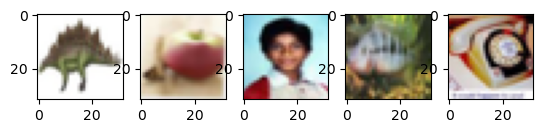

In [3]:
# plot images
import matplotlib.pyplot as plt

plt.subplot(1, 5, 1)
plt.imshow(X_train[1])
plt.subplot(1, 5, 2)
plt.imshow(X_train[2])
plt.subplot(1, 5, 3)
plt.imshow(X_train[3])
plt.subplot(1, 5, 4)
plt.imshow(X_train[4])
plt.subplot(1, 5, 5)
plt.imshow(X_train[5])

In [4]:
#task 3 normalizse the pixel values
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
tf.info(X_train)

In [5]:
#encode the labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
y_train.shape()

In [6]:
#taks 4 compile, train, evaluate a CNN model
model_base = tf.keras.Sequential()

model_base.add(Conv2D(16,(3,3),input_shape = (32,32,3), padding='same', activation='relu'))

model_base.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model_base.add(Conv2D(64,(3,3), padding='same', activation='relu'))

model_base.add(MaxPooling2D(2, 2))
model_base.add(Conv2D(128,(3,3), padding='same', activation='relu'))

model_base.add(Flatten())

model_base.add(Dense(256, activation ='relu'))
model_base.add(Dense(256, activation ='relu'))

model_base.add(Dense(100, activation ='softmax'))

In [ ]:
model_base.summary()

In [7]:
optimizer = tf.keras.optimizers.Adam(0.0001)
model_base.compile(loss='categorical_crossentropy',
               optimizer= optimizer,
               metrics='accuracy')

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3)

In [9]:
history = model_base.fit(X_train, y_train, epochs=20,shuffle = True, batch_size = 64, callbacks=[earlyStopping], validation_data=(X_test, y_test))

Epoch 1/20


782/782 [==============================] - 133s 165ms/step - loss: 4.0779 - accuracy: 0.0853 - val_loss: 3.6906 - val_accuracy: 0.1546
Epoch 2/20
782/782 [==============================] - 129s 165ms/step - loss: 3.4730 - accuracy: 0.1847 - val_loss: 3.3720 - val_accuracy: 0.2052
Epoch 3/20
782/782 [==============================] - 130s 167ms/step - loss: 3.1974 - accuracy: 0.2303 - val_loss: 3.1923 - val_accuracy: 0.2345
Epoch 4/20
782/782 [==============================] - 139s 178ms/step - loss: 2.9918 - accuracy: 0.2699 - val_loss: 3.0282 - val_accuracy: 0.2621
Epoch 5/20
782/782 [==============================] - 129s 165ms/step - loss: 2.8172 - accuracy: 0.3048 - val_loss: 2.9147 - val_accuracy: 0.2926
Epoch 6/20
782/782 [==============================] - 128s 164ms/step - loss: 2.6643 - accuracy: 0.3352 - val_loss: 2.8247 - val_accuracy: 0.3056
Epoch 7/20
782/782 [==============================] - 129s 165ms/step - loss: 2.5273 - accuracy: 0.3618 - val_loss: 2.7570

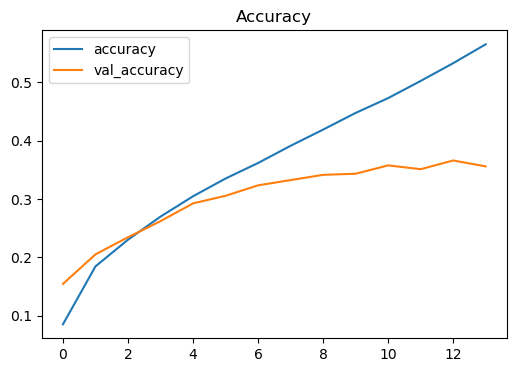

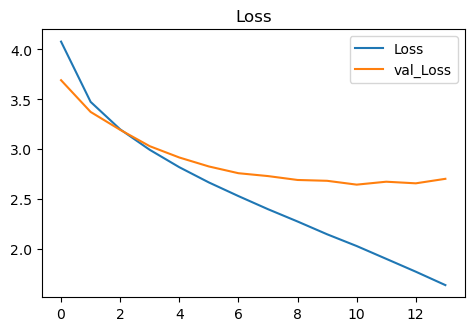

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.legend()

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.legend()

1/1 [==============================] - 0s 246ms/step


'skunk'

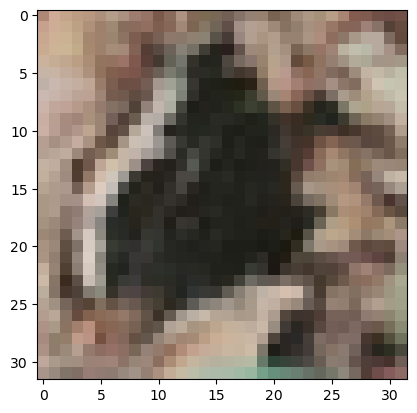

In [11]:
import numpy as np

labels = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
          'bottles', 'bowls', 'cans', 'cups', 'plates', 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 
          'bed', 'chair', 'couch', 'table', 'wardrobe' , 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 'bear', 'leopard', 'lion', 'tiger', 'wolf',
          'bridge', 'castle', 'house', 'road', 'skyscraper' , 'cloud', 'forest', 'mountain', 'plain', 'sea', 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
          'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 'crab', 'lobster', 'snail', 'spider', 'worm', 'baby', 'boy', 'girl', 'man', 'woman',
          'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',  'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 'maple', 'oak', 'palm', 'pine', 'willow',
          'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

plt.imshow(X_test[7])

pred = np.argmax(model_base.predict(X_test[7].reshape(1, 32, 32, 3)))
labels[pred]